# Chapter 2 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Basic Tools and Principles of Process Control

In [2]:
import warnings
import matplotlib.pyplot as plt
import mistat
import pingouin as pg
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import tree
import statsmodels.formula.api as smf
import pwlf

## Basic Concepts of Statistical Process Control

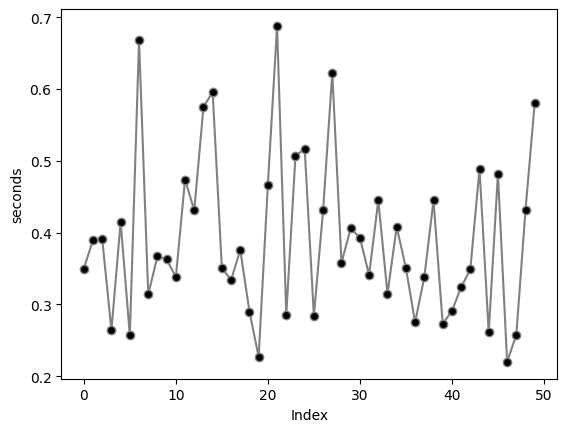

In [3]:
oturb1 = mistat.load_data('OTURB1')
ax = oturb1.plot(y=['seconds'], color='grey', legend=False, marker='o', markerfacecolor='black')
ax.set_xlabel('Index')
ax.set_ylabel('seconds')
plt.show()

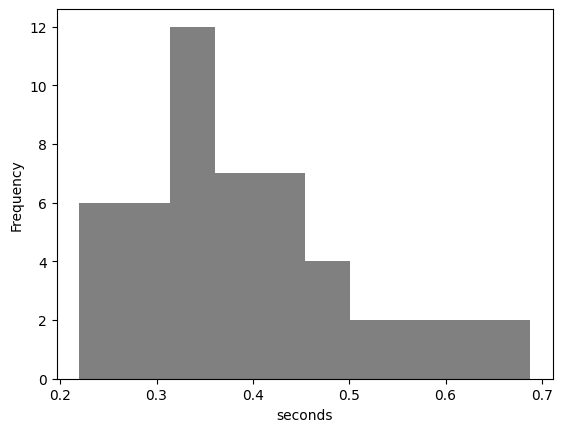

In [4]:
ax = oturb1.plot.hist(bins=10, color='grey')
ax.set_xlabel('seconds')
ax.set_ylabel('Frequency')
plt.show()

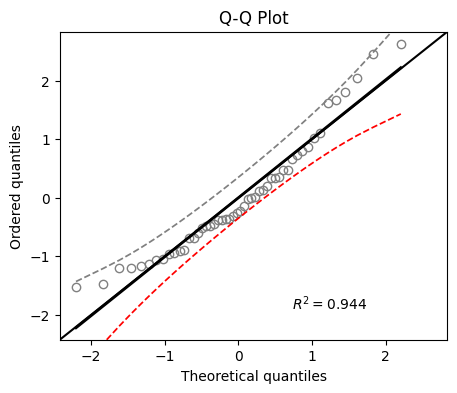

In [5]:
pg.qqplot(oturb1)
ax = plt.gca()
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

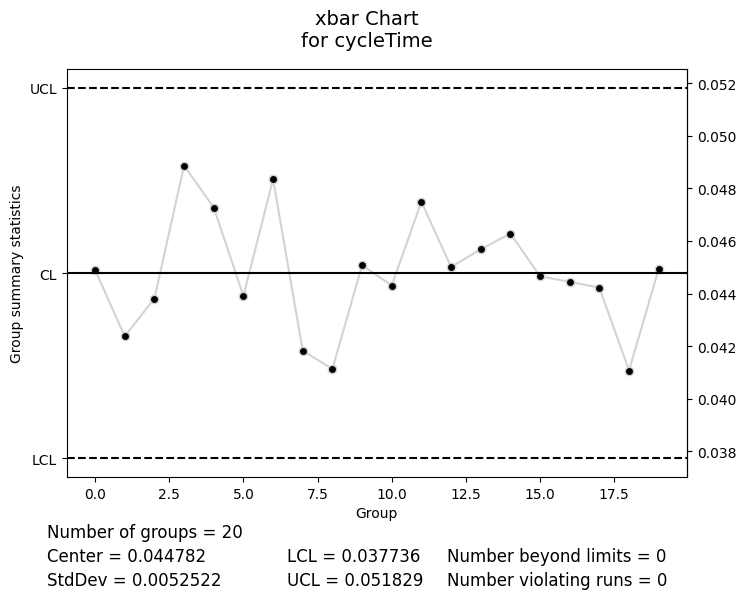

In [6]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)
Ps = simulator.simulate()

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

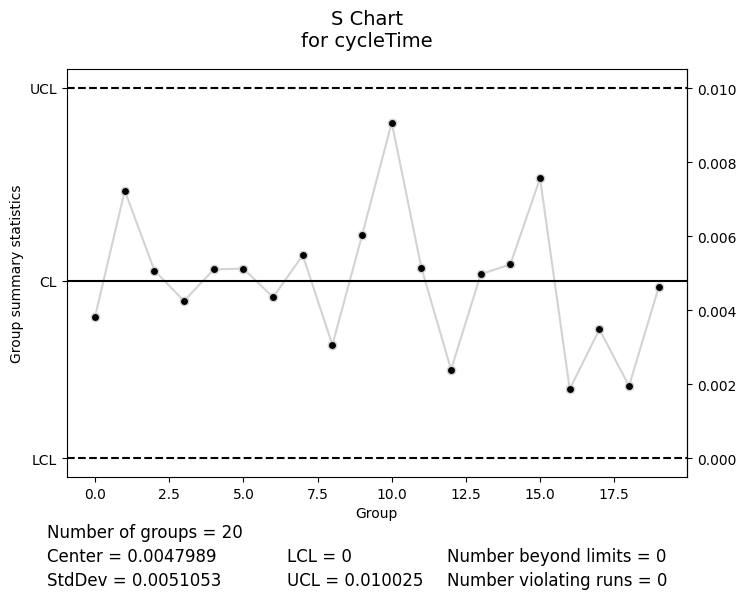

In [7]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

In [8]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)
Ps = simulator.simulate()

Ps['seconds'].groupby(Ps['group']).apply(np.mean)

group
1     0.044902
2     0.042374
3     0.043812
4     0.048865
5     0.047265
6     0.043910
7     0.048345
8     0.041833
9     0.041135
10    0.045080
11    0.044307
12    0.047490
13    0.045008
14    0.045684
15    0.046281
16    0.044656
17    0.044445
18    0.044227
19    0.041077
20    0.044947
Name: seconds, dtype: float64

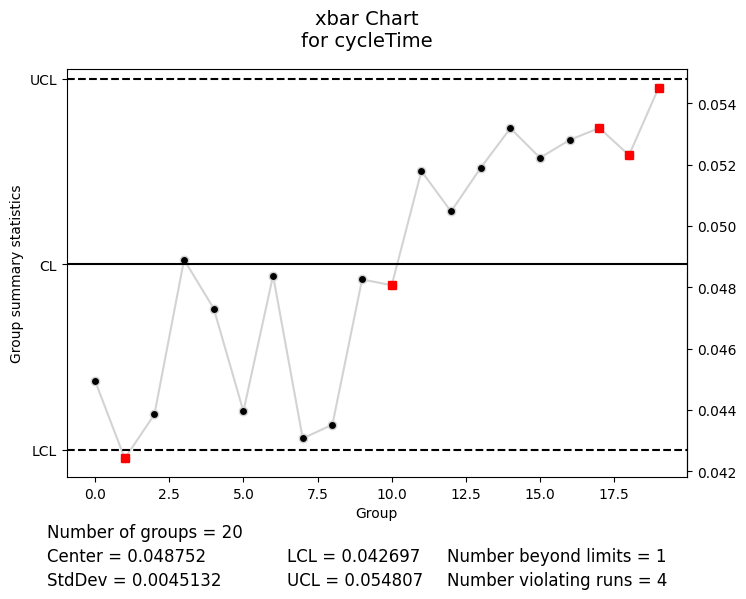

In [9]:
t = [295] * 7
t.extend([296 * 1.2**i for i in range(1, 14)])
simulator = mistat.PistonSimulator(t=t, seed=1, check=False, n_simulation=20, n_replicate=5)
Ps = simulator.simulate()

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

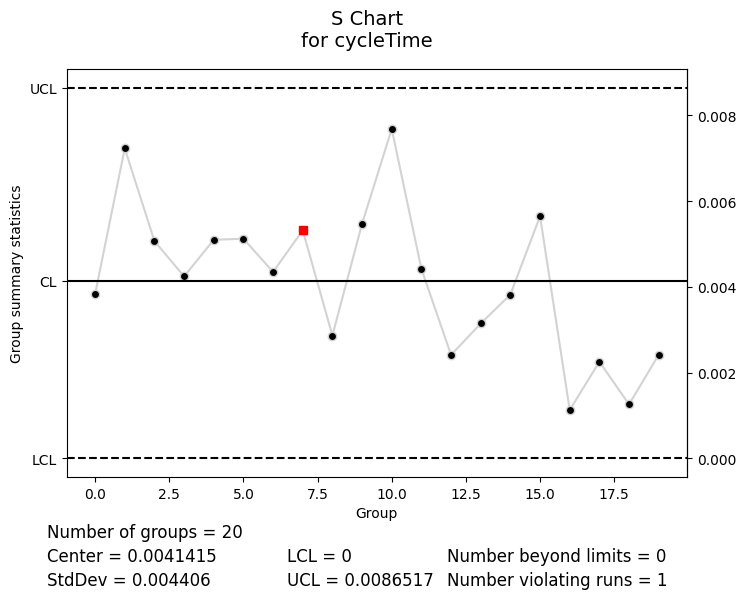

In [10]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

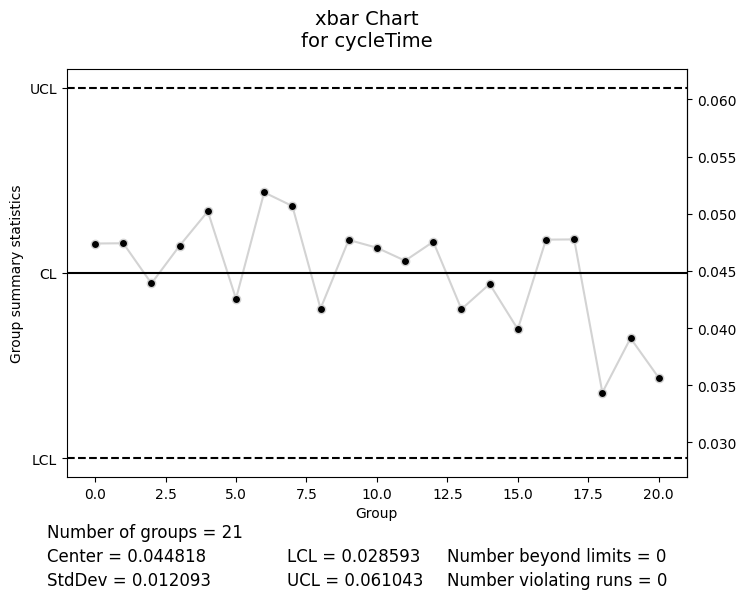

In [11]:
k = [3_000] * 105
sigma_k = [50] * 45
sigma_k.extend([50 * 1.15**i for i in range(1, 61)])

Ps = mistat.PistonSimulator(k=k, seed=3, check=False)
Ps.errors['k'] = sigma_k
Ps = Ps.simulate()
Ps = mistat.simulationGroup(Ps, 5)

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

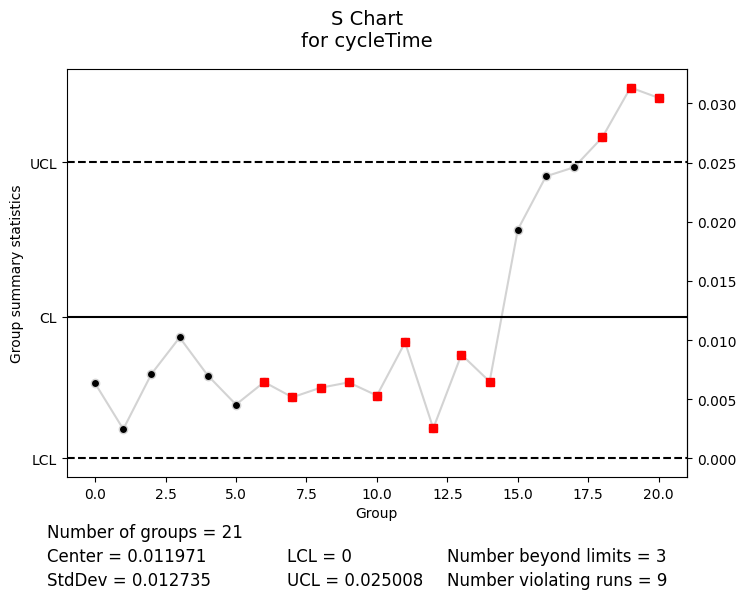

In [12]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

## Driving a Process with Control Charts

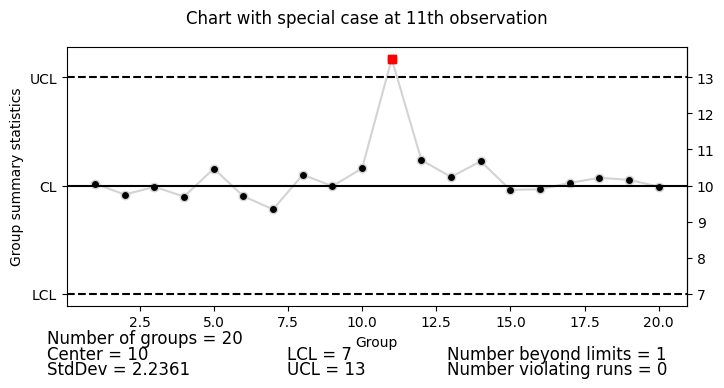

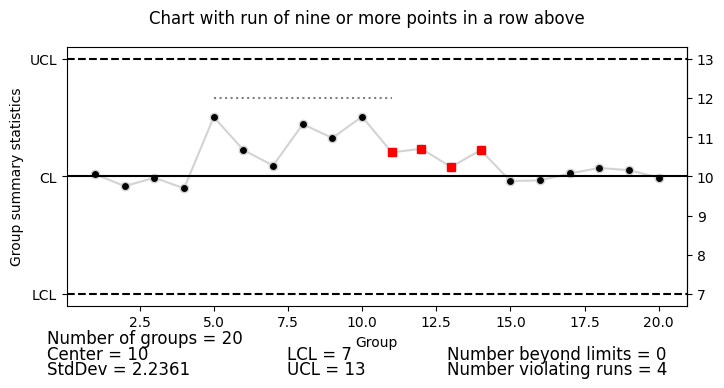

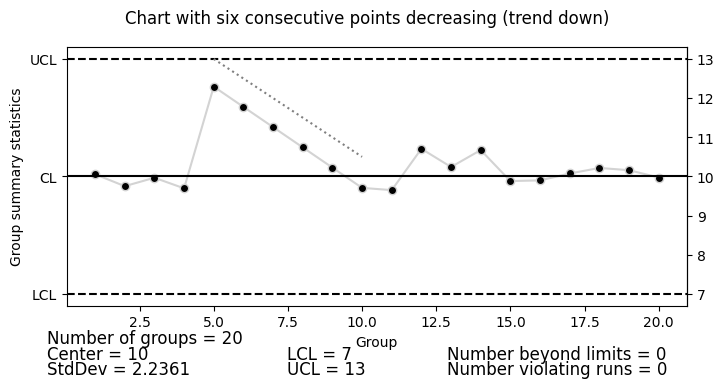

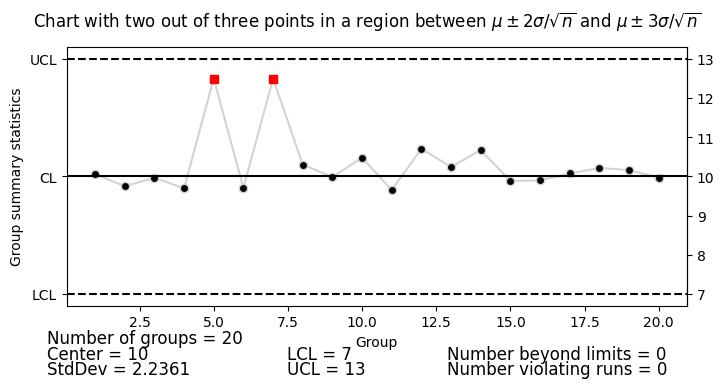

In [13]:
np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[50:55] = 1.4 * X[50:55]

G = [int(i) for i in np.repeat(np.linspace(1, 20, 20), 5)]
Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

figsize = (8, 3.8)
fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot(11, qcc.stats.statistics[10], 'r', marker='s')
fig.suptitle('Chart with special case at 11th observation')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:55] = 1.1 * X[20:55]

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot([5, 11], [12, 12], color='grey', linestyle='dotted')
fig.suptitle('Chart with run of nine or more points in a row above')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:50] = np.linspace(12.5, 9.5, 30)

G = [int(i) for i in np.repeat(np.linspace(1, 20, 20), 5)]

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot([5, 10], [13, 10.5], color='grey', linestyle='dotted')
fig.suptitle('Chart with six consecutive points decreasing (trend down)')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:25] = 12.5
X[30:35] = 12.5

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot(5, qcc.stats.statistics[4], 'r', marker='s')
ax.plot(7, qcc.stats.statistics[6], 'r', marker='s')
fig.suptitle('Chart with two out of three points in a region between $\mu\pm 2\sigma/\sqrt{n}$ and $\mu \pm 3\sigma/\sqrt{n}$')

plt.show()

## Setting Up a Control Chart:  Process Capability Studies

        LCL       UCL
0  0.037736  0.051829


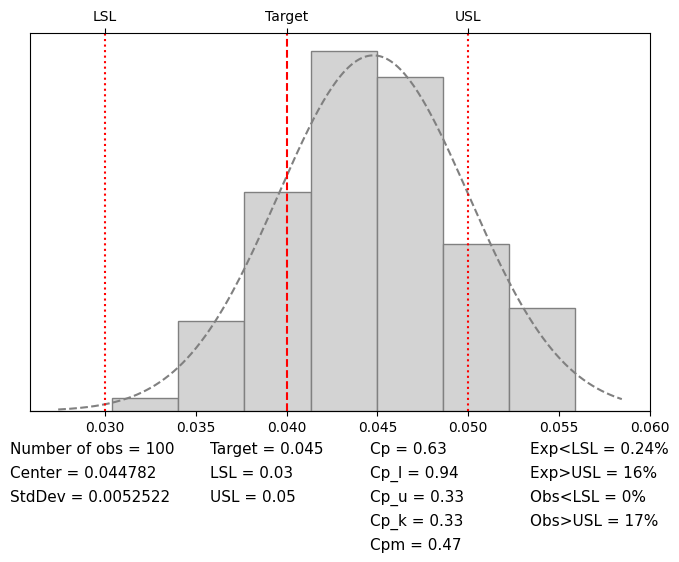

Process Capability Analysis

Number of obs = 100          Target = 0.04
       Center = 0.04            LSL = 0.03
       StdDev = 0.005252        USL = 0.05

Capability indices:

        Value     2.5%   97.5%
Cp      0.6347  0.5463  0.7228
Cp_l    0.9382  0.8156  1.0608
Cp_u    0.3312  0.2640  0.3983
Cp_k    0.3312  0.2512  0.4111
Cpm     0.4693  0.3910  0.5474

Exp<LSL   0%   Obs<LSL   0%
Exp>USL  16%   Obs>USL  17%
z_target: -0.910
z_usl: 0.994
p_above_usl: 0.160


In [14]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)
Ps = simulator.simulate()

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)
print(qcc.limits)

pc = mistat.ProcessCapability(qcc, spec_limits = [0.03, 0.05])

pc.plot()
plt.show()
pc.summary()
z_target = (0.04 - 0.04478) / 0.0052521
z_usl = (0.05 - 0.04478) / 0.0052521
p_above_usl = 1-stats.norm.cdf((0.05 - 0.04478) / 0.0052521)
print(f'z_target: {z_target:.3f}')
print(f'z_usl: {z_usl:.3f}')
print(f'p_above_usl: {p_above_usl:.3f}')

## Process Capability Indices

In [15]:
np.random.seed(seed=1) # fix random seed for reproducibility
X = stats.norm.rvs(size=20, scale=1/3)
Xbar = np.mean(X)
S = np.std(X)

In [16]:
Cpl = (Xbar - (-1)) / (3 * S)
Cpu = (1 - Xbar) / (3 * S)
Cpk = min(Cpu, Cpl)
F = stats.f.ppf(0.975, 1, 19)

In [17]:
b = 1 - F/40
a = np.sqrt(F/20) * np.sqrt( Cpl**2/2 + b/9)
rho_1U = (Cpl + a) / b
rho_1L = (Cpl - a) / b
a = np.sqrt(F/20) * np.sqrt( Cpu**2/2 + b/9)
rho_2U = (Cpu + a) / b
rho_2L = (Cpu - a) / b

## Seven Tools for Process Control and Process Improvement

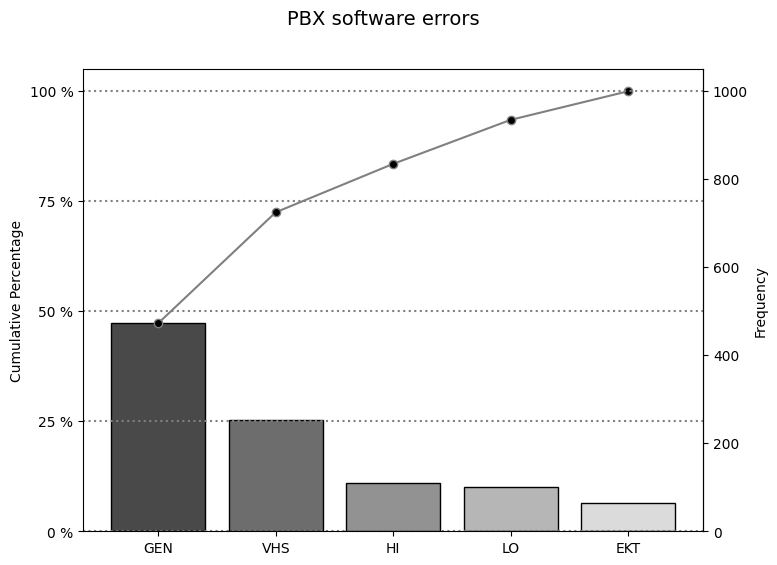

In [18]:
pbx = mistat.load_data('PBX')
pbx = pbx.set_index('Unit')

paretoChart = mistat.ParetoChart(pbx, title='PBX software errors')
paretoChart.plot()
plt.show()

## Statistical Analysis of Pareto Charts

## The Shewhart Control Charts

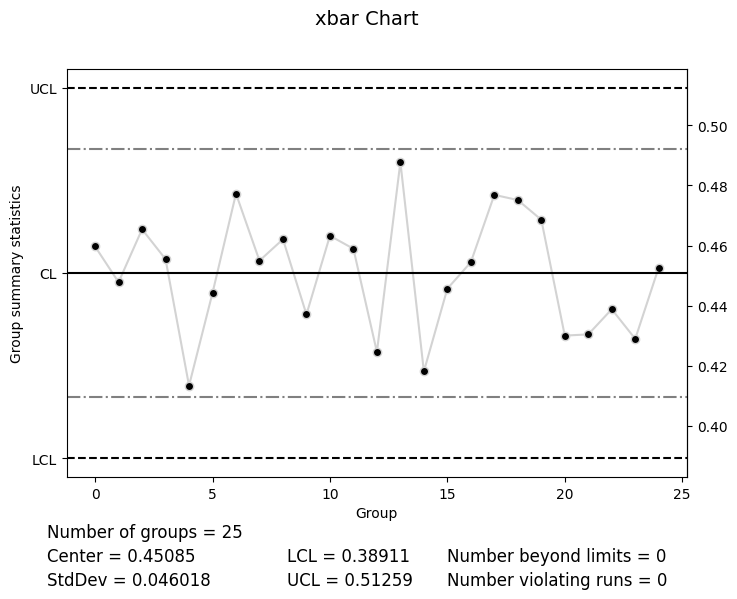

In [19]:
gasturbine = mistat.load_data('GASTURBINE')

qcc = mistat.QualityControlChart(gasturbine)
ax = qcc.plot()
ax.axhline(0.4508481 + 0.04601819*2/np.sqrt(5), color='gray', linestyle='-.')
ax.axhline(0.4508481 - 0.04601819*2/np.sqrt(5), color='gray', linestyle='-.')
plt.show()

### Control Charts for Attributes

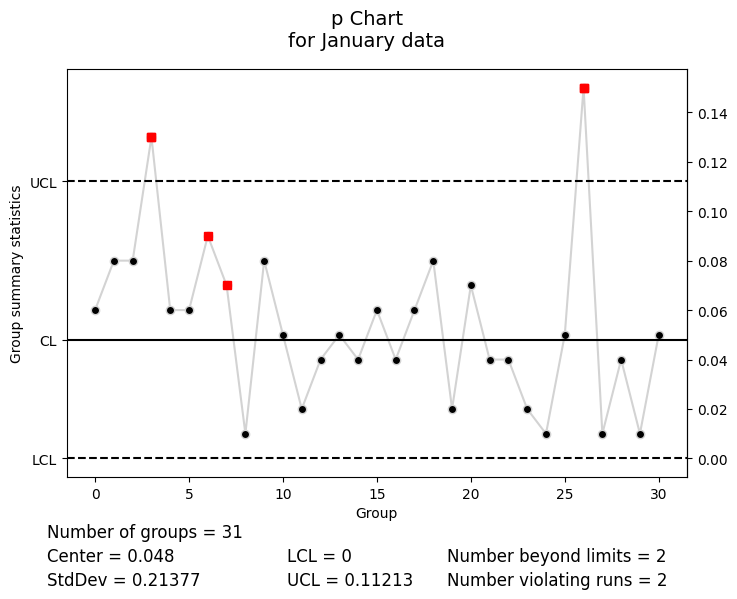

In [20]:
jandefect = mistat.load_data('JANDEFECT')
jandefect = jandefect / 100

qcc = mistat.QualityControlChart(jandefect, qcc_type='p', sizes=100, center=0.048, std_dev=np.sqrt(0.048*(1-0.048)))
ax = qcc.plot(title='for January data')
for group in (3, 26):
    ax.plot(group, qcc.stats.statistics[group], 'r', marker='s')
plt.show()

### Control Charts for Variables

#### $\bar X$-Charts

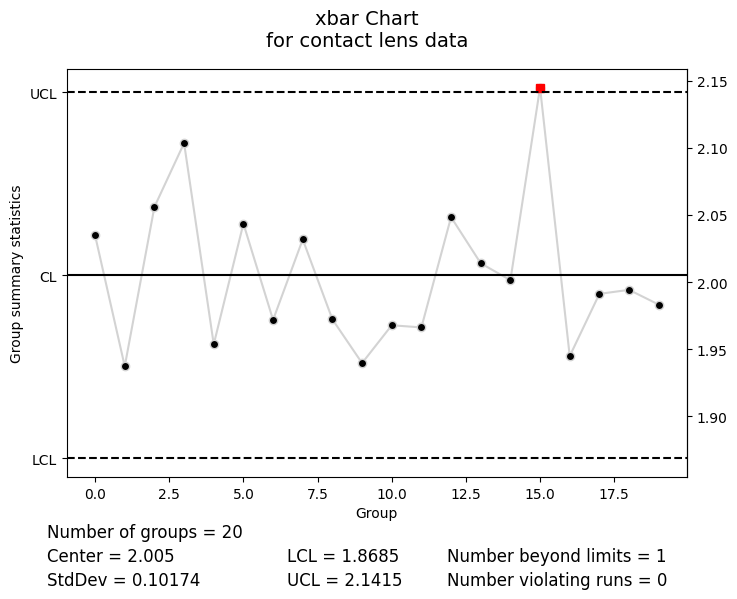

In [21]:
contactlen = mistat.load_data('CONTACTLEN')

qcc = mistat.QualityControlChart(contactlen, qcc_type='xbar')
ax = qcc.plot(title='for contact lens data')
plt.show()

#### $S$-Charts and $R$-Charts

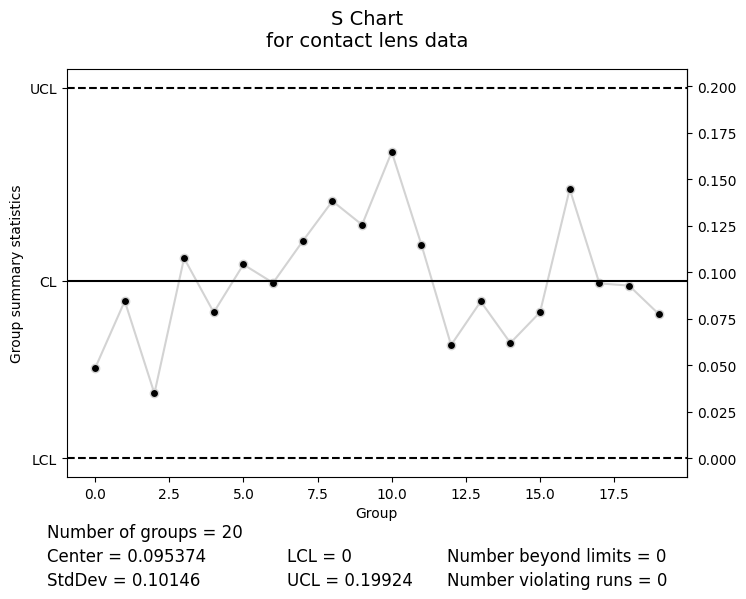

In [22]:
qcc = mistat.QualityControlChart(contactlen, qcc_type='S')
ax = qcc.plot(title='for contact lens data')
plt.show()

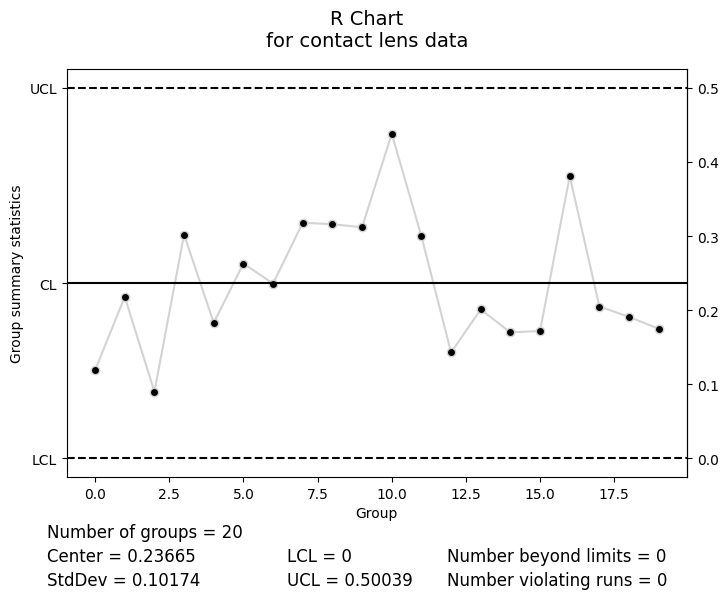

In [23]:
qcc = mistat.QualityControlChart(contactlen, qcc_type='R')
ax = qcc.plot(title='for contact lens data')
plt.show()

## Process Analysis with Data Segments

### Data Segments Based on Decision Trees

In [24]:
# Ignore user warning thrown here
warnings.filterwarnings('ignore', category=UserWarning)

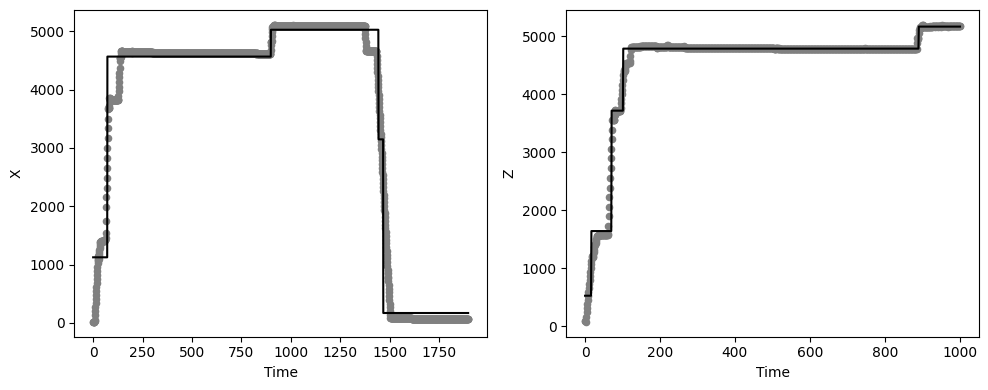

In [25]:
data = mistat.load_data('PROCESS_SEGMENT')

# Load and prepare data for analysis
def sensorData(data, label):
    series = data[label]
    return pd.DataFrame({
        'Time': np.arange(len(series)),
        'values': series,
    })
sensorX = sensorData(data, 'X')
sensorZ = sensorData(data, 'Z')

# Build decision trees for segment analysis
def addSegmentAnalysis(sensor, max_leaf_nodes):
  model = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
  model.fit(sensor[['Time']], sensor['values'])
  sensor['predicted'] = model.predict(sensor[['Time']])
  return sensor, model
sensorX, modelX = addSegmentAnalysis(sensorX, 5)
sensorZ, modelZ = addSegmentAnalysis(sensorZ, 5)

# Plot data
def plotSegmentAnalysis(sensor, label, ax):
  sensor.plot.scatter(x='Time', y='values', ax=ax, color='grey')
  ax.plot(sensor['Time'], sensor['predicted'], color='black')
  ax.set_xlabel('Time')
  ax.set_ylabel(label)

data = mistat.load_data('PROCESS_SEGMENT')
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plotSegmentAnalysis(sensorX, 'X', axes[0])
plotSegmentAnalysis(sensorZ, 'Z', axes[1])
plt.tight_layout()

In [26]:
import dtreeviz
def viz2pdf(viz, pdfFile):
  from svglib.svglib import svg2rlg
  from reportlab.graphics import renderPDF
  from tempfile import NamedTemporaryFile
  with NamedTemporaryFile(mode='w+', suffix='.svg') as f:
    f.write(viz.svg())
    f.flush()
    f.seek(0)
    drawing = svg2rlg(f.name)
    renderPDF.drawToFile(drawing, pdfFile)

def segmentTreeVisualization(model, series, label, filename=None):
  df = pd.DataFrame({
    'Time': np.arange(len(series)),
    'values': series,
  })
  viz = dtreeviz.model(model, df[['Time']], df['values'],
                 target_name=label,
                 feature_names=['Time'])
  if filename is not None:
    viz2pdf(viz, filename)
  return viz

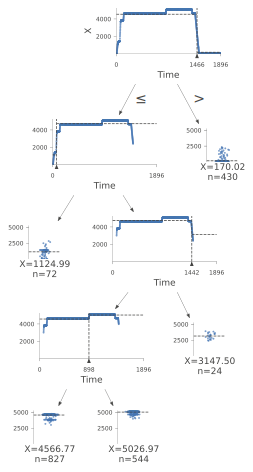

In [27]:
segmentTreeVisualization(modelX, data['X'], 'X').view(fontname='sans-serif')

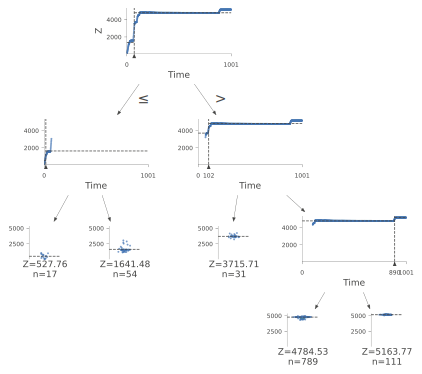

In [28]:
segmentTreeVisualization(modelZ, data['Z'], 'Z').view(fontname='sans-serif')

In [29]:
def statisticsSegmentAnalysis(sensor):
    uniqueValues = list(sensor['predicted'].unique())
    sensor['level'] = [uniqueValues.index(v) + 1 for v in sensor['predicted']]
    model = smf.ols('values ~ C(level) - 1', data=sensor).fit()
    statistics = pd.read_html(model.summary().tables[1].as_html(), 
                              header=0, index_col=0)[0]
    statistics.index = [f'Level {i}' for i in range(1, len(uniqueValues) + 1)]
    statistics = statistics.drop(columns=['t', 'P>|t|'])
    statistics = statistics.rename(columns={'coef': 'Mean', 'std err': 'SEM'})
    borders = [np.where(sensor['predicted'] == uniqueValue)[0][0]
              for uniqueValue in uniqueValues]

    Range = [f'${left} \leq\mathrm{{Time}}<{right}$' 
             for left, right in zip(borders[1:-1], borders[2:])]
    Range.insert(0, f'$\\mathrm{{Time}}<{borders[1]}$')
    Range.append(f'${borders[-1]} \leq\\mathrm{{Time}}$')
    statistics.insert(0, 'Range', Range)
    statistics.insert(1, 'Count', sensor['level'].value_counts(sort=False).values)
    return statistics, borders

statisticsX, bordersX = statisticsSegmentAnalysis(sensorX)
statisticsZ, bordersZ = statisticsSegmentAnalysis(sensorZ)

In [30]:
statisticsX['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in statisticsX['Range']]
statisticsX

,Range,Count,Mean,SEM,[0.025,0.975]
Level 1,Time <72,72,1124.9861,33.168,1059.937,1190.035
Level 2,72 <= Time <899,827,4566.7739,9.787,4547.580,4585.967
Level 3,899 <= Time <1443,544,5026.9651,12.067,5003.300,5050.630
Level 4,1443 <= Time <1467,24,3147.5000,57.448,3034.832,3260.168
Level 5,1467 <= Time,430,170.0186,13.572,143.401,196.636


In [31]:
statisticsZ['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in statisticsZ['Range']]
statisticsZ

,Range,Count,Mean,SEM,[0.025,0.975]
Level 1,Time <17,17,527.7647,28.467,471.902,583.627
Level 2,17 <= Time <71,54,1641.4815,15.972,1610.138,1672.825
Level 3,71 <= Time <102,31,3715.7097,21.081,3674.342,3757.078
Level 4,102 <= Time <891,789,4784.5285,4.179,4776.329,4792.728
Level 5,891 <= Time,111,5163.7748,11.141,5141.913,5185.636


In [32]:
# Restore display of user warning
warnings.filterwarnings('default', category=UserWarning)

### Data Segments Based on Functional Data Analysis

In [33]:
def fitPiecewiseLinearFit(sensor, segments):
  model = pwlf.PiecewiseLinFit(sensor['Time'], sensor['values'], degree=0)
  model.fit(segments)
  return model

modelX = fitPiecewiseLinearFit(sensorX, 9)
modelX = fitPiecewiseLinearFit(sensorZ, 6)

In [34]:
# The fitting routine takes some time. We mock the model results here:
class MockedPiecewiseLinearFit:
  def __init__(self, fit_breaks, beta):
    fit_breaks.append(fit_breaks[-1] + 1)
    self.fit_breaks = np.array(fit_breaks)
    beta.insert(0, 0)
    beta.append(0)
    self.beta = np.array(beta)
    self.cum_beta = np.cumsum(self.beta)

  def predict(self, x):
    return np.array([
        self.cum_beta[np.where(xi < self.fit_breaks)][0]
        for xi in x
    ])
modelX = MockedPiecewiseLinearFit(
  fit_breaks=[0.0, 19.1, 69.4, 131.6, 902.2, 1377.3, 1444.8, 1467.8, 1490.2, 1896.0],
  beta=[275.0, 1125.1, 2351.8, 876.9, 457.9, -505.8, -1531.8, -1493.0, -1470.1],
)
modelZ = MockedPiecewiseLinearFit(
  fit_breaks=[0, 14.2, 63.5, 70.6, 101.1, 890.1, 1001],
  beta=[460.2, 1025.9, 1068.3, 1161.1, 1068.8, 379.2],
)

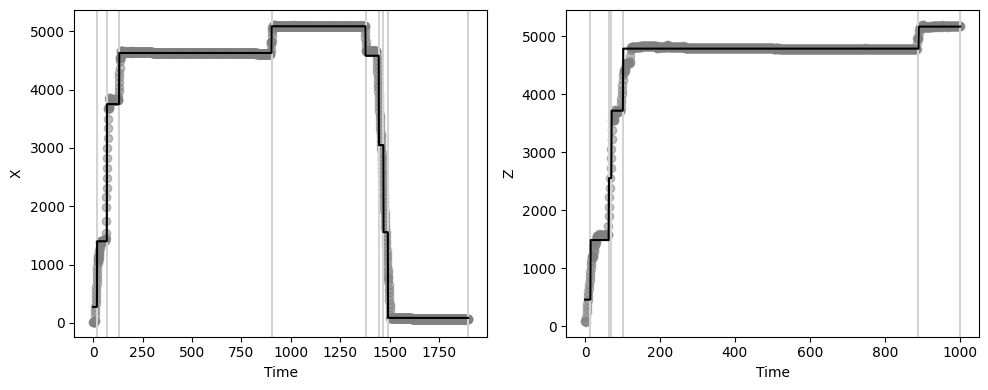

In [35]:
def plotPiecewiseLinearFit(sensor, model, ax, label):
    for bp in model.fit_breaks[1:-1]:
        ax.axvline(bp, color='lightgrey')
    ax.scatter(sensor['Time'], sensor['values'], color='grey', alpha=0.5)
    ax.plot(sensor['Time'], model.predict(sensor['Time']), color='black')
    ax.set_xlabel('Time')
    ax.set_ylabel(label)
    return ax

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plotPiecewiseLinearFit(sensorX, modelX, axes[0], 'X')
plotPiecewiseLinearFit(sensorZ, modelZ, axes[1], 'Z')
plt.tight_layout()
plt.show()

In [36]:
def getResultTable(model):
    df = pd.DataFrame({'breaks': model.fit_breaks[1:-1], 'prediction': model.cum_beta[1:-1]})
    borders = list(df['breaks'])
    Range = [f'${left} \leq\mathrm{{Time}}<{right}$' for left, right in zip(borders[1:-1], borders[2:])]
    Range.insert(0, f'$\\mathrm{{Time}}<{borders[1]}$')
    Range.append(f'${borders[-1]} \leq\\mathrm{{Time}}$')
    df.insert(0, 'Range', Range)
    df.index = [f'Level {idx + 1}' for idx in df.index]
    df = df.drop(columns='breaks')
    return df
    style = df.style
    style = style.format(precision=1)
    return style.to_latex(hrules=True)
df = getResultTable(modelX)

In [37]:
df['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in df['Range']]
df

,Range,prediction
Level 1,Time <69.4,275.0
Level 2,69.4 <= Time <131.6,1400.1
Level 3,131.6 <= Time <902.2,3751.9
Level 4,902.2 <= Time <1377.3,4628.8
Level 5,1377.3 <= Time <1444.8,5086.7
Level 6,1444.8 <= Time <1467.8,4580.9
Level 7,1467.8 <= Time <1490.2,3049.1
Level 8,1490.2 <= Time <1896.0,1556.1
Level 9,1896.0 <= Time,86.0


In [38]:
df = getResultTable(modelZ)

In [39]:
df['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in df['Range']]
df

,Range,prediction
Level 1,Time <63.5,460.2
Level 2,63.5 <= Time <70.6,1486.1
Level 3,70.6 <= Time <101.1,2554.4
Level 4,101.1 <= Time <890.1,3715.5
Level 5,890.1 <= Time <1001.0,4784.3
Level 6,1001.0 <= Time,5163.5


## Chapter Highlights

## Exercises